# Advanced Convolutional Neural Networks (CNN) - 1
- Objective: try different structures of CNNs
- Note: examples are performed on **i5 7600 + gtx 1060 6GB **

## Deeper Networks
- It is one of definite trends that CNN models submitted to ILSVRC are getting deeper and deeper
<img src="https://cdn-images-1.medium.com/max/756/1*Io-I-fOM0jGftDb_nne4KQ.png" style="width: 600px"/>

<br>
- Deeper networks are able to learn more "abstract" representations by comprising more operations and nonlinearities 
- However, they are difficult and costly to train and prone to overfitting

<img src="http://cs231n.github.io/assets/cnnvis/filt1.jpeg" style="width: 400px"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"


## Load Dataset
- MNIST Dataset
- Doc: https://keras.io/datasets/

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# reshaping X data: (n, 28, 28) => (n, 28, 28, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [4]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


## 0. Basic CNN model
- Basic CNN similar to what we made before
- One convolutional & pooling layer

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [7]:
def basic_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [8]:
model = basic_cnn()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 50)        500       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9800)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                490050    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 491,060
Trainable params: 491,060
Non-trainable params: 0
__________________________________________________

In [10]:
%%time
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.2, epochs = 10, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 280us/sample - loss: 2.2813 - accuracy: 0.8452 - val_loss: 0.2113 - val_accuracy: 0.9465
Epoch 2/10
48000/48000 [==============================] - 7s 144us/sample - loss: 0.1553 - accuracy: 0.9591 - val_loss: 0.1621 - val_accuracy: 0.9602
Epoch 3/10
48000/48000 [==============================] - 7s 143us/sample - loss: 0.1001 - accuracy: 0.9715 - val_loss: 0.1395 - val_accuracy: 0.9650
Epoch 4/10
48000/48000 [==============================] - 7s 144us/sample - loss: 0.0637 - accuracy: 0.9823 - val_loss: 0.1270 - val_accuracy: 0.9701
Epoch 5/10
48000/48000 [==============================] - 7s 145us/sample - loss: 0.0474 - accuracy: 0.9850 - val_loss: 0.1205 - val_accuracy: 0.9727
Epoch 6/10
48000/48000 [==============================] - 7s 143us/sample - loss: 0.0390 - accuracy: 0.9877 - val_loss: 0.1194 - val_accuracy: 0.9720
Epoch 7/10
48000/48000 [=========================

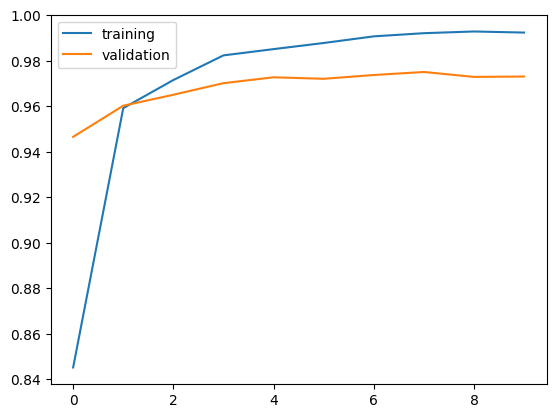

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [12]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 4s 387us/sample - loss: 0.1171 - accuracy: 0.9756


In [13]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9756


## 1. Deep CNN - 1
- Deeper network with 6 convolutional layers and 3 pooling layers
- Note that two (3x3) convolutional layers are stacked
    - It is equivalent to using one (5X5) convolutional layer, but with fewer parameters
    - Similar to the structured used in VGGnet

In [14]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [15]:
model = deep_cnn()

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 50)       

In [17]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 10, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 43s 887us/sample - loss: 0.2192 - accuracy: 0.9361 - val_loss: 0.0606 - val_accuracy: 0.9812
Epoch 2/10
48000/48000 [==============================] - 34s 705us/sample - loss: 0.0584 - accuracy: 0.9825 - val_loss: 0.0552 - val_accuracy: 0.9820
Epoch 3/10
48000/48000 [==============================] - 42s 884us/sample - loss: 0.0446 - accuracy: 0.9860 - val_loss: 0.0561 - val_accuracy: 0.9847
Epoch 4/10
48000/48000 [==============================] - 46s 964us/sample - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0453 - val_accuracy: 0.9862
Epoch 5/10
48000/48000 [==============================] - 40s 827us/sample - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.0405 - val_accuracy: 0.9881
Epoch 6/10
48000/48000 [==============================] - 73s 2ms/sample - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0361 - val_accuracy: 0.9887
Epoch 7/10
48000/48000 [======================

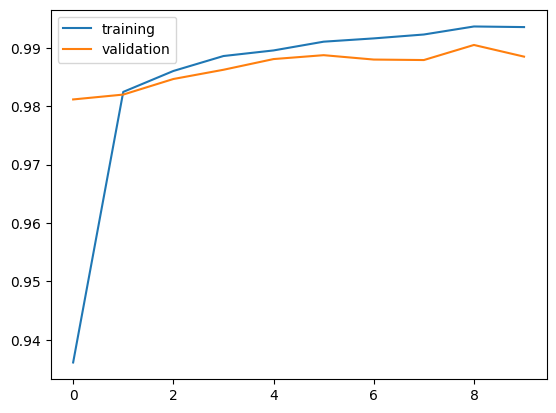

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training is rather unstable; accuracy falling down after around 80 epochs

In [19]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 5s 541us/sample - loss: 0.0351 - accuracy: 0.9884


In [20]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9884


## 2. Deep CNN - 2
- Measures used to ameliorate the performance of MLPs are employed
    - Weight Initialization
    - Batch Normalization
    - Dropout

In [21]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [22]:
def deep_cnn_advanced():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [23]:
model = deep_cnn_advanced()

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 50)        200       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 50)       

In [25]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 10, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 62s 1ms/sample - loss: 0.3929 - accuracy: 0.8737 - val_loss: 0.0818 - val_accuracy: 0.9753
Epoch 2/10
48000/48000 [==============================] - 58s 1ms/sample - loss: 0.1297 - accuracy: 0.9615 - val_loss: 0.0464 - val_accuracy: 0.9877
Epoch 3/10
48000/48000 [==============================] - 62s 1ms/sample - loss: 0.1057 - accuracy: 0.9686 - val_loss: 0.0410 - val_accuracy: 0.9887
Epoch 4/10
48000/48000 [==============================] - 46s 966us/sample - loss: 0.0792 - accuracy: 0.9761 - val_loss: 0.0464 - val_accuracy: 0.9893
Epoch 5/10
48000/48000 [==============================] - 45s 946us/sample - loss: 0.0728 - accuracy: 0.9783 - val_loss: 0.0397 - val_accuracy: 0.9908
Epoch 6/10
48000/48000 [==============================] - 41s 860us/sample - loss: 0.0624 - accuracy: 0.9813 - val_loss: 0.0338 - val_accuracy: 0.9921
Epoch 7/10
48000/48000 [==========================

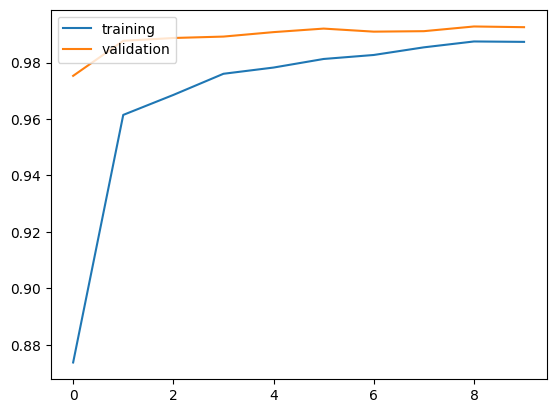

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Stable and comparable result is obtained

In [27]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 5s 507us/sample - loss: 0.0229 - accuracy: 0.9937


In [28]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9937


## 3. Deep CNN - 3
- One of the ways to reduce the number of parameters in a model is proposed in Min et al 2013 (https://arxiv.org/abs/1312.4400)
- Namely "Network In Network (NIN)" or "1 X 1 convolutions"
    - Method is simple - adding convolutional layers after other convolutional layers
    - Has the effect of reducing the dimensionality (depth) of image space, effectively reducing the number of parameters
    
<img src="https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/conv_arithmetic/full_padding_no_strides_transposed_small.gif" style="width: 200px"/>

<br>
- GoogleNet architecture (Inception) utilizes NIN structure

<img src="https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/inception_1x1.png" style="width: 800px"/>

In [29]:
def deep_cnn_advanced_nin():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model 

In [30]:
model = deep_cnn_advanced_nin()

In [31]:
model.summary()    # note that the number of parameters are greatly reduced

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_13 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 50)        22550     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 25)        1275      
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 25)        100       
_________________________________________________________________
activation_14 (Activation)   (None, 28, 28, 25)       

In [36]:
%%time
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.2, epochs = 10, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.0296 - val_accuracy: 0.9934
Epoch 2/10
48000/48000 [==============================] - 42s 868us/sample - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0289 - val_accuracy: 0.9936
Epoch 3/10
48000/48000 [==============================] - 41s 862us/sample - loss: 0.0284 - accuracy: 0.9905 - val_loss: 0.0293 - val_accuracy: 0.9934
Epoch 4/10
48000/48000 [==============================] - 42s 868us/sample - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.0315 - val_accuracy: 0.9935
Epoch 5/10
48000/48000 [==============================] - 42s 879us/sample - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.0319 - val_accuracy: 0.9933
Epoch 6/10
48000/48000 [==============================] - 42s 872us/sample - loss: 0.0241 - accuracy: 0.9917 - val_loss: 0.0317 - val_accuracy: 0.9936
Epoch 7/10
48000/48000 [======================

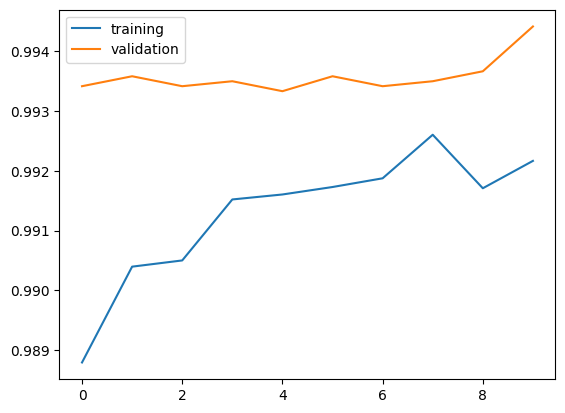

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Fairly stable result even with smaller number of parameters

In [38]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 5s 505us/sample - loss: 0.0260 - accuracy: 0.9938


In [39]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9938
